In [2]:
from numpy import *
import operator
import matplotlib.pyplot as plt

In [3]:
#KNN算法实现
def classify0(inX,dataSet,labels,x):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in  range(x):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [4]:
#读取约会数据及其标签
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOlines = len(arrayOLines)
    returnMat = zeros((numberOlines,3))
    classLabelVector = []
    index  = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine  = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

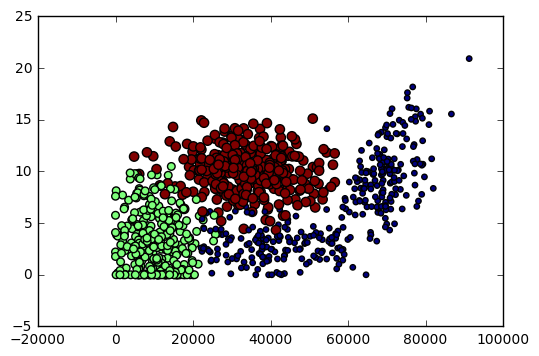

In [6]:
datingDatas,datingLabels = file2matrix('datingTestSet2.txt')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDatas[:,0],datingDatas[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

In [7]:
#数据归一化（里程数太大）
#计算方法newValue = (oldValue - min)/(max-min)
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals-minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [8]:
#测试模型准确率
def datingClasssTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with:%d,the real answer is:%d"%(classifierResult,datingLabels[i]))
        if(classifierResult != datingLabels[i]):
            errorCount += 1.0
    print("总错误率为：%f"%(errorCount/float(numTestVecs)))

In [9]:
#预测
def calssifyPerson():
    resultList = ['not at all','in small doses','in large doses']
    percentTags = float(input("percentage of time spent playing video games?  "))
    ffMiles = float(input("frequent flier miles earned per year?  "))
    iceCream = float(input("liters of ice cream consumed per year?  "))
    datingDatas,datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDatas)
    inArr = array([ffMiles,percentTags,iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print("You will probably this person:",resultList[classifierResult-1])

In [10]:
calssifyPerson()

percentage of time spent playing video games?  10
frequent flier miles earned per year?  1200
liters of ice cream consumed per year?  0.5
You will probably this person: in small doses
